In [2]:
import os
os.chdir('C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\pyimagesearch')
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from timeseires.CNN1D.GoogLeNet1D import PC
from timeseires.utils.to_split import to_split
from timeseires.utils.multivariate_multi_step import multivariate_multi_step
from timeseires.utils.multivariate_single_step import multivariate_single_step
from timeseires.utils.univariate_multi_step import univariate_multi_step
from timeseires.utils.univariate_single_step import univariate_single_step
from timeseires.utils.CosineAnnealingLRS import CosineAnnealingLRS
from timeseires.callbacks.EpochCheckpoint import EpochCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
from timeseires.callbacks.TrainingMonitor import TrainingMonitor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, RepeatVector
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D,TimeDistributed,Minimum
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,MaxPooling1D,Concatenate,AveragePooling1D, GlobalMaxPooling1D, Input
from tensorflow.keras.models import Sequential,Model
import pandas as pd
import time, pickle
import pydot
import numpy as np
import tensorflow.keras.backend as K
import tensorflow
from tensorflow.keras.layers import Input, Reshape, Dense, Lambda,Average,Add
from tensorflow.keras.layers import Layer, Flatten, LeakyReLU, concatenate
from tensorflow.keras.regularizers import l2
import glob
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

In [3]:
def statistics(tensor):
    mean1 = tf.reduce_mean(tensor)
    mean = tf.reshape(mean1, (-1,1), name=None)
    
    std1 = tf.math.reduce_std(tensor)
    std = tf.reshape(std1, (-1,1), name=None)
    
    min1 = tf.math.reduce_min(tensor)
    Min = tf.reshape(min1, (-1,1), name=None)
    
    max1 = tf.math.reduce_max(tensor)
    Max = tf.reshape(max1, (-1,1), name=None)
      
    skew1 = tf.reduce_mean(tf.math.pow(((tensor-mean1)/std1), 3, name=None))
    ske = tf.reshape(skew1, (-1,1), name=None)
    
    kurt1 = tf.reduce_mean(tf.math.pow(((tensor-mean1)/std1), 4, name=None))
    kurt = tf.reshape(skew1, (-1,1), name=None)
    
    com = tf.concat([mean, std, Min, Max, ske, kurt], 1)
    return com


In [4]:
    import tensorflow as tf
    from scipy.stats import kurtosis
    from scipy.stats import skew
    input_data = Input(shape=(24, 1))

    stat = tensorflow.keras.layers.Lambda(statistics, name="lambda_layer")(input_data)
    
    max1 = MaxPooling1D(2)(input_data)
    max2 = MaxPooling1D(3)(input_data)
    max3 = MaxPooling1D(4)(input_data)

    x1_1 = Conv1D(16, 2, activation="relu", padding = 'same')(max1)
    x1_2 = Conv1D(16, 3, activation="relu",  padding = 'same')(max2)
    x1_3 = Conv1D(16, 4, activation="relu",  padding = 'same')(max3)

    x2_1 = Conv1D(16, 2, activation="relu",  padding = 'same')(x1_1)
    x2_2 = Conv1D(16, 2, activation="relu",  padding = 'same')(x1_2)
    x2_3 = Conv1D(16, 2, activation="relu",  padding = 'same')(x1_3)

    con = Concatenate(axis=1)([x2_1, x2_2, x2_3])

    gcon = Conv1D(10, 16, activation="relu")(con)
    max_pool_1d = MaxPooling1D()(gcon)
    cnn = Flatten()(max_pool_1d)

    x = LSTM(20, return_sequences=True)(input_data)
    x = LSTM(10)(x)
    lstm = Flatten()(x)

    clstm = Concatenate(axis=-1)([cnn, lstm, stat])

    output_data = Dense(1)(clstm)
    model = Model(input_data, output_data)
    model.compile(loss='mse', optimizer='adam')

In [5]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 1)]      0                                            
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 12, 1)        0           input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 8, 1)         0           input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 6, 1)         0           input_1[0][0]                    
_______________________________________________________________________________________

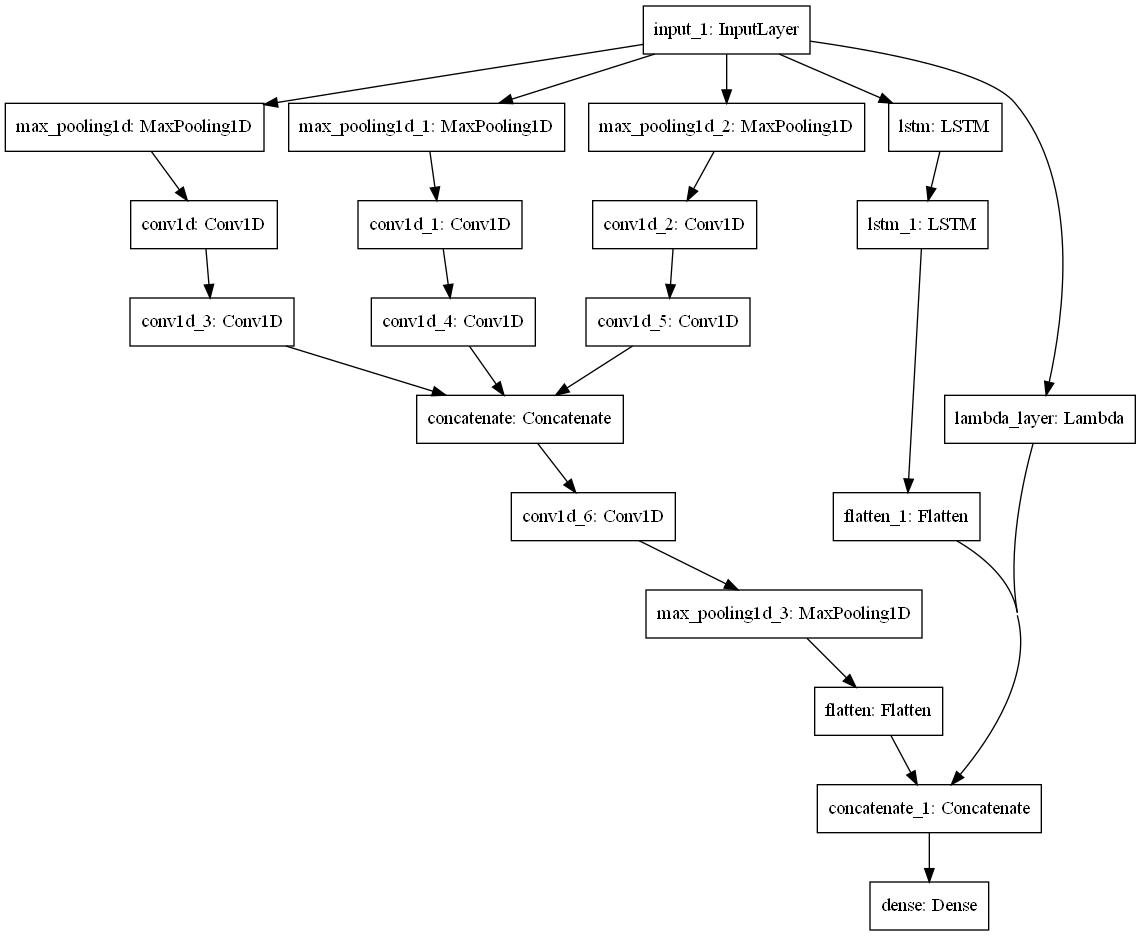

In [6]:
tensorflow.keras.utils.plot_model(model)

In [7]:
def r9_6(time_steps, num_features):
    
    input_data = Input(shape=(time_steps, num_features))

    stat = tensorflow.keras.layers.Lambda(statistics)(input_data)
        
    max1 = MaxPooling1D(2)(input_data)
    max2 = MaxPooling1D(3)(input_data)
    max3 = MaxPooling1D(4)(input_data)

    x1_1 = Conv1D(16, 2, activation="relu", padding = 'same')(max1)
    x1_2 = Conv1D(16, 3, activation="relu",  padding = 'same')(max2)
    x1_3 = Conv1D(16, 4, activation="relu",  padding = 'same')(max3)

    x2_1 = Conv1D(16, 2, activation="relu",  padding = 'same')(x1_1)
    x2_2 = Conv1D(16, 2, activation="relu",  padding = 'same')(x1_2)
    x2_3 = Conv1D(16, 2, activation="relu",  padding = 'same')(x1_3)

    con = Concatenate(axis=1)([x2_1, x2_2, x2_3])

    gcon = Conv1D(10, 16, activation="relu")(con)
    max_pool_1d = MaxPooling1D()(gcon)
    cnn = Flatten()(max_pool_1d)

    x = LSTM(20, return_sequences=True)(input_data)
    x = LSTM(10)(x)
    lstm = Flatten()(x)

    clstm = Concatenate(axis=-1)([cnn, lstm, stat])

    output_data = Dense(1)(clstm)
    model = Model(input_data, output_data)
    return model

In [8]:
  model = r9_6(24,1)

In [9]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 24, 1)]      0                                            
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 12, 1)        0           input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_5 (MaxPooling1D)  (None, 8, 1)         0           input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_6 (MaxPooling1D)  (None, 6, 1)         0           input_2[0][0]                    
_______________________________________________________________________________________